In [35]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri
import matplotlib.pylab as pl

from cycler import cycler

illinois 30.647713186281315
30.647713186281315
30.18666427996199
30.13301974492658
38.51756685155824
41.79039253945806
34.61855043295946
40.69393310316981
[0.  0.1 0.2 0.5 1.  1.5 2.  3.  4. ] [1.e-02 1.e-01 3.e-01 1.e+00 3.e+00 1.e+01 3.e+01 1.e+02]


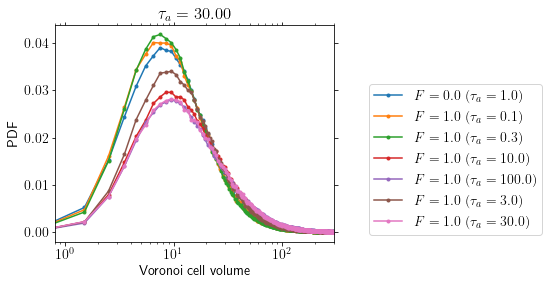

In [59]:
# mpl.rcParams.update({'font.size': 14, 'usetex': True})
mpl.rcParams.update({'font.size':14, 'text.usetex':True})
# print(mpl.rcParams.keys)
fig,ax=plt.subplots(1,1,figsize=(5,4))
# ax.set_prop_cycle(cycler('color', plt.cm.RdBu))
fpath='../../data_new/SAC_R020_N100/'
ind=3
colors = pl.cm.hot(np.linspace(0,1,15))
colors = pl.cm.Dark2(np.linspace(0,1,8))
colors=['r','c','m','g','b']
fnames=os.listdir(fpath+'VCV/')

for (name,tp) in [('low',0.1)]:#,('mid',1.0), ('high',100)]:
    vcv=[]
    Fs=[]
    Tas=[]
    vcv_eq=0
    count=0
    ax.clear()
    for fname in fnames:
        if 'VCV' in fname and '.npz' in fname and 'rep1' in fname:
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)

            npzfile=np.load(fpath+'VCV/'+fname)
            Fs.append(F)
            Tas.append(Ta)
            hist,bins=npzfile['hist'],npzfile['bins']
            Nrep=1
            for index in range(2,10):
                fname_rep=fname.replace('rep1','rep{}'.format(index))

                if fname_rep in fnames:
                    # print(fname_rep)
                    repfile=np.load(fpath+'VCV/'+fname_rep)
                    try:
                        hist+=repfile['hist'][:len(hist)]
                        Nrep+=1
                    except(ValueError,):
                        val=repfile['hist']
                        hist+=np.pad(val, (0,hist.shape[0]-val.shape[0]))
                        Nrep+=1
            hist=hist/(Nrep)
            
            
            vcv_avg=simps(hist*bins, bins)
            
            vcv.append(vcv_avg)
            
            if F==0.0 and Ta==1.0: 
                print('illinois',vcv_avg)
                vcv_eq=vcv_avg
                Fs.append(0)
                Tas.append(0.01)
                vcv.append(vcv_avg)

            if F==0.0 or F==1:
            # for fval,taval in [(0.0,1.0),(0.3,0.1),(0.3,100.),(2,0.1),(2,100)]:
                # if F!=fval or Ta!=taval: continue
                ax.plot(npzfile['bins'], npzfile['hist'],'.-', label='$F={:.1f}\ (\\tau_a={:.1f})$'.format(F,Ta),)
                count+=1
                ax.set_title('$\\tau_a={:.2f}$'.format(Ta))
                print(vcv_avg)
    ax.legend(loc='lower left',bbox_to_anchor=(1.1,0))
    ax.semilogx()
    ax.set_xlim(0.8,300)
    ax.set_ylabel('PDF')
    ax.set_xlabel('Voronoi cell volume')
    print(np.unique(Fs),np.unique(Tas))
    # fig.savefig(fpath+'plots/VCV_{}Ta.png'.format(name),bbox_inches='tight', dpi=300)


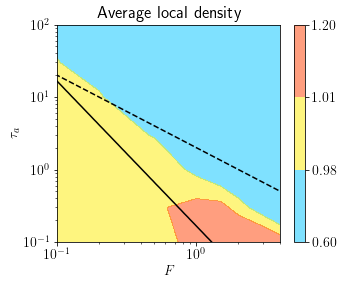

In [93]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
Xi,Yi=np.meshgrid(np.unique(Fs),np.unique(Tas))
Xp,Yp=np.meshgrid(np.logspace(-4,1,100), np.logspace(-4,4,100))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,vcv_eq/np.array(vcv))
Zi=interpZ(Xi,Yi)
# plt.contourf(Xi, Yi, Zi, levels=np.arange(0.6,1.075,0.025),cmap='jet',alpha=0.8)
plt.contourf(Xi, Yi, Zi, levels=[0.6,0.98,1.01,1.2],cmap='jet',alpha=0.5)
plt.colorbar()
# plt.contour(Xi, Yi, Zi, levels=[0.98, 1.,1.01])
# plt.contour(Xi,Yi,Xi**2*Yi/0.1, levels=np.logspace(-2,4,10))
# plt.plot(Fs,Tas,'k+')
plt.contour(Xp,Yp, Xp**2*Yp/(0.0083*200*0.1),colors='k',levels=[1],)
plt.contour(Xp,Yp,Xp*Yp/(0.1*20), levels=[1],colors='k',linestyles='dashed')
plt.loglog()
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.xlim(1e-1,4)
plt.ylim(1e-1,1e2)
plt.title('Average local density')
plt.savefig(fpath+'/plots/vcv_density.png', dpi=300, bbox_inches='tight')

In [13]:
1/60

0.016666666666666666